# Machine Predictive Maintenance Classification

##### Part 1: EDA
##### Part 2: Feature preprocessing
##### Part 3: Model training and evalutaion

## Part1: EDA

### 1.1 Understand Raw Dataset

In [1]:
import pandas as pd
import numpy as np

maintenance_df=pd.read_csv('predictive_maintenance.csv')

In [2]:
maintenance_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
maintenance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
maintenance_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
maintenance_df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [6]:
maintenance_df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

### 1.2 Understand Data Correlation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

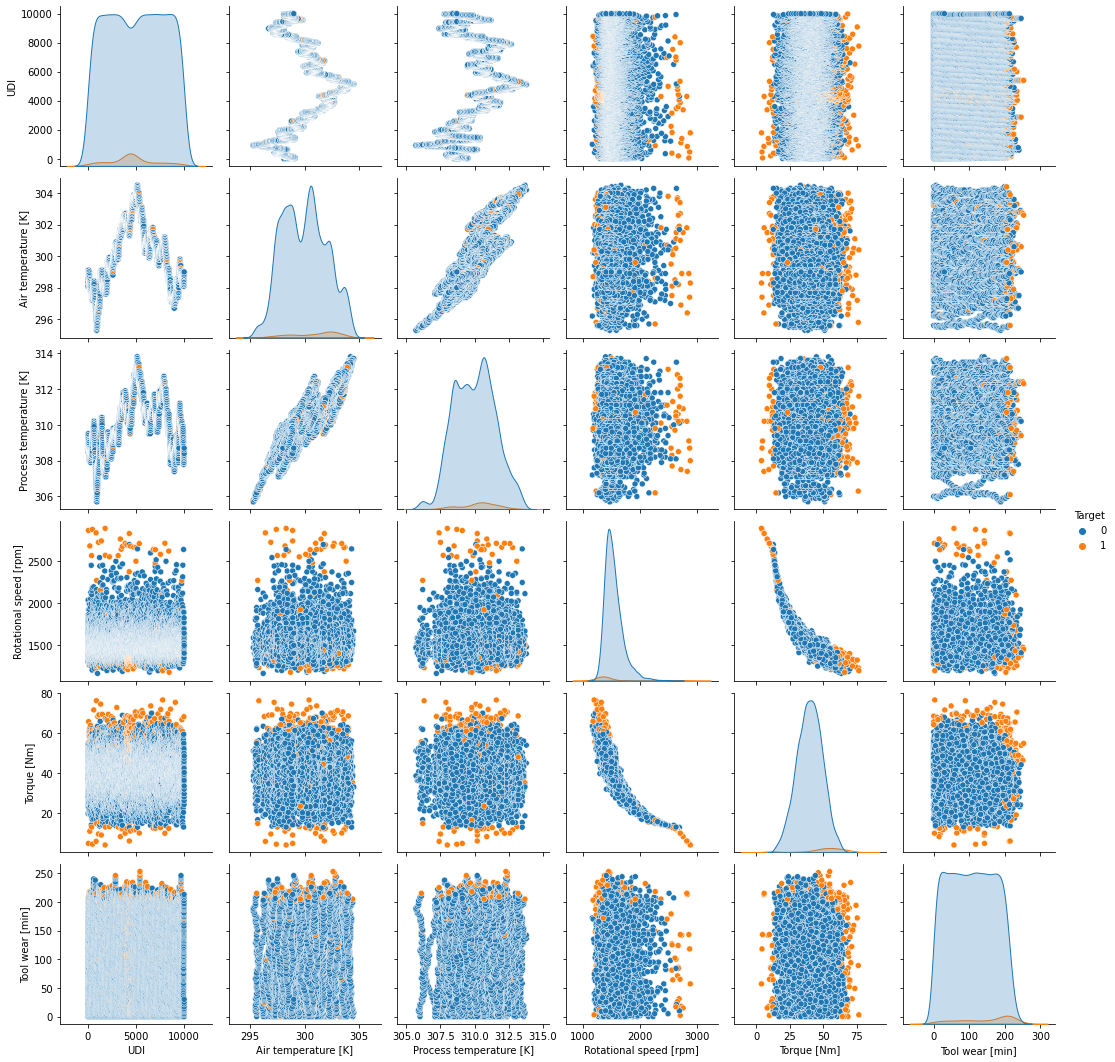

In [8]:
sns.pairplot(maintenance_df, hue='Target')

<AxesSubplot:>

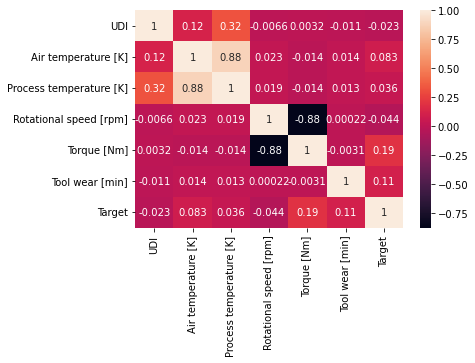

In [9]:
sns.heatmap(maintenance_df.corr(), annot=True)

<AxesSubplot:xlabel='Target', ylabel='Torque [Nm]'>

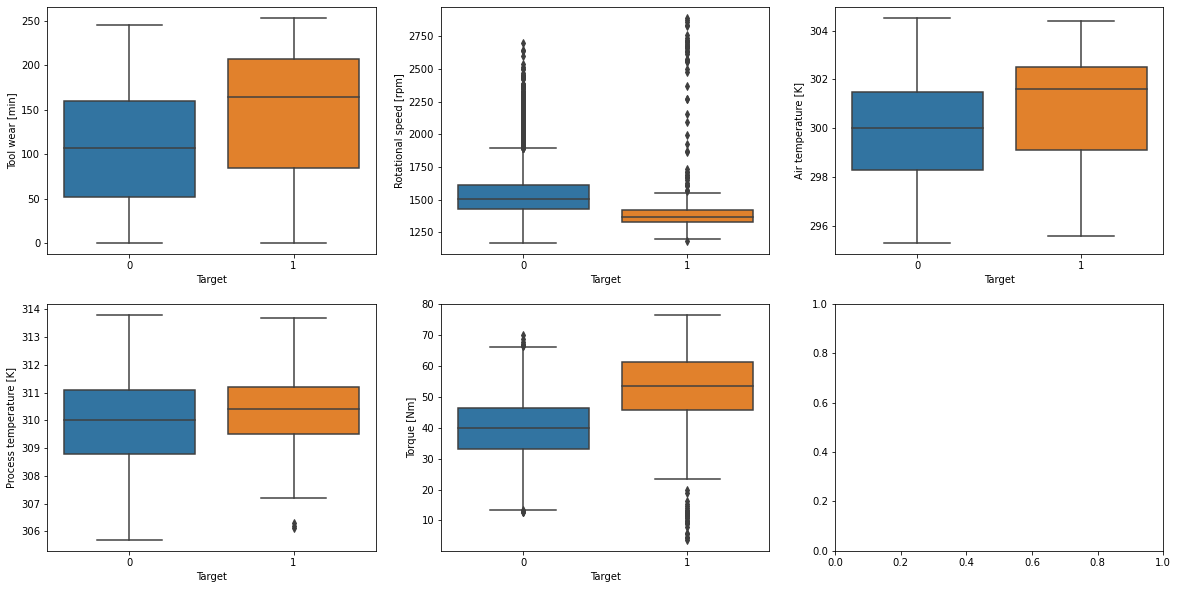

In [10]:
#check feature distribution
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Target', y ='Tool wear [min]', data=maintenance_df, ax=axss[0][0])
sns.boxplot(x='Target', y ='Rotational speed [rpm]', data=maintenance_df, ax=axss[0][1])
sns.boxplot(x='Target', y ='Air temperature [K]', data=maintenance_df, ax=axss[0][2])
sns.boxplot(x='Target', y ='Process temperature [K]', data=maintenance_df, ax=axss[1][0])
sns.boxplot(x='Target', y ='Torque [Nm]', data=maintenance_df, ax=axss[1][1])

<AxesSubplot:xlabel='Target', ylabel='count'>

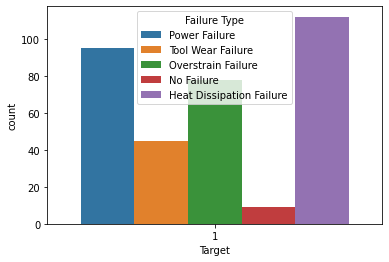

In [11]:
# understand categorical feature
# count plot for 'failure type' feature
failure_maintenance_df=maintenance_df[maintenance_df['Target']==1]
sns.countplot(x='Target', hue='Failure Type', data=failure_maintenance_df)

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Process temperature [K]'>

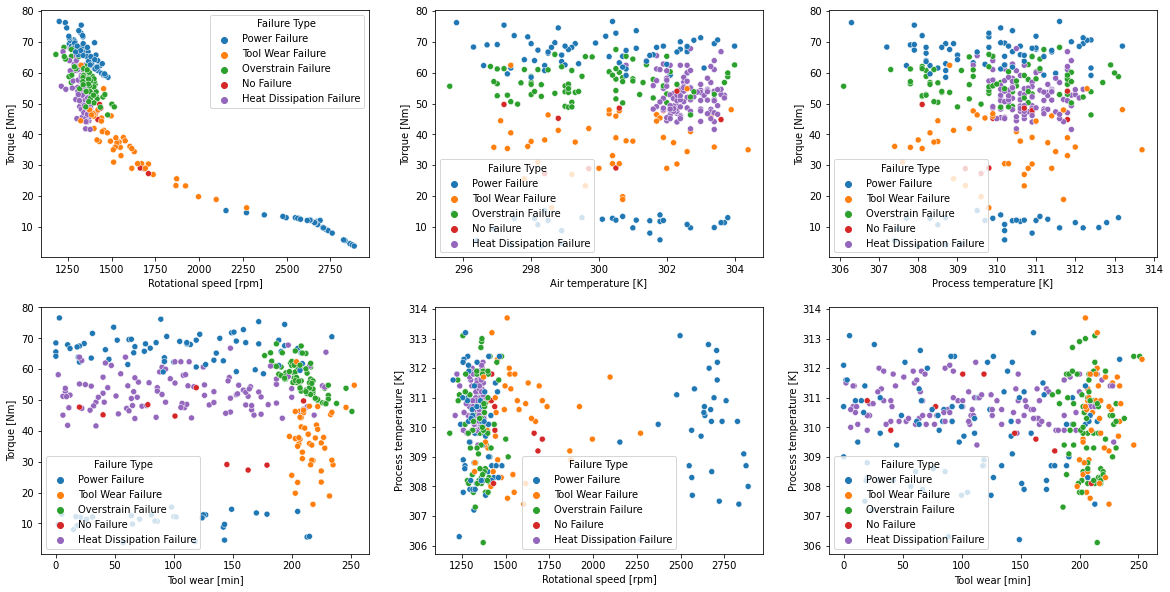

In [12]:
# understand how features affect the type of failure
_,axss = plt.subplots(2,3, figsize=[20,10])
failure=maintenance_df[maintenance_df['Target']==1]
sns.scatterplot(x = 'Rotational speed [rpm]', y='Torque [Nm]', data=failure, hue='Failure Type',ax=axss[0][0])
sns.scatterplot(x = 'Air temperature [K]', y='Torque [Nm]', data=failure, hue='Failure Type',ax=axss[0][1])
sns.scatterplot(x = 'Process temperature [K]', y='Torque [Nm]', data=failure, hue='Failure Type',ax=axss[0][2])
sns.scatterplot(x = 'Tool wear [min]', y='Torque [Nm]', data=failure, hue='Failure Type',ax=axss[1][0])
sns.scatterplot(x = 'Rotational speed [rpm]', y='Process temperature [K]', data=failure, hue='Failure Type',ax=axss[1][1])
sns.scatterplot(x = 'Tool wear [min]', y='Process temperature [K]', data=failure, hue='Failure Type',ax=axss[1][2])

### Insights from EDA
- There are 10k rows of data in this dataset, with no missing or duplicated values

- 3 catergorical values: product_id, type, failure_type

- 4 discrete numerical values:  UDI, tool_wear, target, rotaional_speed

- 3 continuous numerical values:  air_temperature, process_temperature, torque

- Target values are 1 and 0

- There are 5 different types of failure, which are Power Failure, Tool Wear Failure, Overstrain Failure, Heat Dissipation Failure and Random Failures. We can either predict if the machine is going to fail or not (2 possibilities), or predict the detailed result of the machine (6 possibilities) -- We use the latter one

- Data is highly unbalanced, with 339 failures and 9661 non-failures

- From the pairplot, rotational speed and torque are highly correlated; process temperature and air temperature are highly correlated, failures tend to appear at extreme values

- From the boxplot, machines with higher tool wear, highger air temperature, higher procoess temperature, higher torque, and lower rotational speed tend to failure more

- From the countplot, among all the failure machine, heat dissipation is the most common reason for the failure, and the tool failure is the least commmon. There are several datapoints are considered failure in the 'target' column but no failure in the 'failure_type' column, which needs to be handled later


## Part 2: Feature preprocessing

### 2.1 Drop useless columns and rename features

In [13]:
# drop the useless columns
# since we need to predict if the machine will be 
maintenance=maintenance_df.copy()
maintenance=maintenance.drop(['UDI','Product ID'], axis=1)

In [14]:
# rename columns for convience
maintenance = maintenance.rename(columns={'Air temperature [K]':'air_temp','Process temperature [K]':'process_temp',
                               'Rotational speed [rpm]':'rotational_speed','Torque [Nm]':'torque',
                              'Tool wear [min]':'tool_wear','Target':'target','Failure Type':'failure_type',
                              'Type':'type'})

In [15]:
maintenance.head()

,type,air_temp,process_temp,rotational_speed,torque,tool_wear,target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


### 2.2 Drop inconsistent instances
##### Instances classfied as failure in 'target' column but non-failure in the 'failure type' column
##### Instances classified as non-failure in 'target' but failure in the 'failure type' column

In [16]:
mask1=maintenance['target']==1
mask2=maintenance['failure_type']=='No Failure'
s1 = maintenance[mask1 & mask2]
s1

,type,air_temp,process_temp,rotational_speed,torque,tool_wear,target,failure_type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [17]:
maintenance = maintenance.drop(s1.index)

In [18]:
maintenance[maintenance['target']==0]['failure_type'].value_counts()

No Failure         9643
Random Failures      18
Name: failure_type, dtype: int64

In [19]:
mask1=maintenance['target']==0
mask2=maintenance['failure_type']=='Random Failures'
s2=maintenance[mask1 & mask2]
s2

,type,air_temp,process_temp,rotational_speed,torque,tool_wear,target,failure_type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [20]:
maintenance = maintenance.drop(s2.index)

In [21]:
maintenance.shape

(9973, 8)

### 2.3 Split the data

##### Based the prediction of 'failure_type' not 'target'
##### Data is highly unbalanced, needs to do the stratified sampling

In [22]:
X = maintenance.drop(['target','failure_type'], axis=1)
y = maintenance['failure_type']

In [23]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7479 observation with 6 features
test data has 2494 observation with 6 features


### 2.4 Encoding for categorical columns 'type' and 'failure_type'

In [24]:
# dummy variable encoding
d_type_train = pd.get_dummies(X_train['type'], prefix='type')
d_type_test = pd.get_dummies(X_test['type'], prefix='type')

In [25]:
temp_train=X_train.drop(['type'], axis=1)
temp_test=X_test.drop(columns=['type'])
X_train=pd.concat([d_type_train,temp_train], axis=1)
X_test=pd.concat([d_type_test,temp_test], axis=1)

In [26]:
# Ordinal encoding

y_train_frame=y_train.to_frame()
y_test_frame=y_test.to_frame()

from sklearn.preprocessing import OrdinalEncoder
categories = ['failure_type']
enc_oe = OrdinalEncoder()
enc_oe.fit(y_train_frame[categories])
y_train_frame[categories] = enc_oe.transform(y_train_frame[categories])
y_test_frame[categories] = enc_oe.transform(y_test_frame[categories])

In [27]:
y_test=y_test_frame['failure_type']
y_train=y_train_frame['failure_type']

### 2.4 Scale the data
##### We can either standardize or normalize the data to make sure all values are on the same scale, here using standardization

In [28]:
num_cols=['air_temp','process_temp','rotational_speed','torque','tool_wear']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Part 3: Model Training and Result Evaluation

### 3.1 Model Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [30]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    print('\n')
    count += 1

/Users/kenzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kenzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[0.97727273 0.97927807 0.98061497 0.97994652 0.98060201]
Model accuracy of Logistic Regression is 0.9795428612308408


[0.97058824 0.97125668 0.97192513 0.97259358 0.97324415]
Model accuracy of KNN is 0.9719215567041655


[0.97526738 0.97794118 0.97794118 0.97794118 0.9826087 ]
Model accuracy of Random Forest is 0.9783399209486167




### 3.2 Hyperparameters tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# helper function for printing out grid search results

def printGsResult(gs):
    print('Best Score: '+ str(gs.best_score_))
    print('Best Paramter Set: '+ str(gs.best_params_))

#### 3.2.1 Logistic Regression hyperparameter tuning

In [33]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2

parameters = {'penalty':('l1', 'l2'), 
              'C':(0.01, 0.05, 0.1, 0.2, 0.8, 1)}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 0.8, 1),
                         'penalty': ('l1', 'l2')})

In [34]:
printGsResult(Grid_LR)

Best Score: 0.9743280632411067
Best Paramter Set: {'C': 1, 'penalty': 'l1'}


In [35]:
best_LR_model = Grid_LR.best_estimator_

#### 3.2.2 KNN hyperparameter tuning

In [36]:
# Possible hyperparamter options for KNN:
# Choose k

parameters = {'n_neighbors':[1,3,5,9,10]}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 9, 10]})

In [37]:
printGsResult(Grid_KNN)

Best Score: 0.9719215567041655
Best Paramter Set: {'n_neighbors': 5}


In [38]:
best_KNN_model = Grid_KNN.best_estimator_

#### 3.2.3 Random Forest hyperparameter tuning

In [39]:
# Possible hyperparamter options for Random Forest:
# Choose the number of trees
# Choose the number of features selected

parameters = {'n_estimators' : [80,100,150,200],
              'max_depth': [1,5,10]}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [80, 100, 150, 200]})

In [40]:
printGsResult(Grid_RF)

Best Score: 0.9770027542789691
Best Paramter Set: {'max_depth': 10, 'n_estimators': 200}


In [41]:
best_RF_model = Grid_RF.best_estimator_

### 3.3 Model Evaluation 

#### 3.3.1 Confusion Matrix (Accuracy, Precision, Recall)

In [42]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from statistics import mean

def cal_evaluation(classifier, confusion_matrices):
    accuracy_5=[]
    precision_5=[]
    recall_5=[]
    for cm in confusion_matrices:
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = 0 if tp+fp == 0 else tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        accuracy_5.append(accuracy)
        precision_5.append(precision)
        recall_5.append(recall)
    avg_accuracy=mean(accuracy_5)
    avg_precision=sum(precision_5)/len(precision_5)
    avg_recall=mean(recall_5)
    print (classifier)
    print ("Accuracy is: " + str(avg_accuracy))
    print ("Precision is: " + str(avg_precision))
    print ("Recall is: " + str(avg_recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(models):
    class_names = ['No Failure','Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure','Tool Wear Failure']
    print('The accuracy, precision, and recall is the average number of 5 classes')
    print ()
    for model in models:
        classifier, confusion_matrices = model[0], model[1]
        cal_evaluation(classifier, confusion_matrices)

In [43]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", multilabel_confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", multilabel_confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", multilabel_confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

The accuracy, precision, and recall is the average number of 5 classes

Random Forest
Accuracy is: 0.9913392141138733
Precision is: 0.7098827936649235
Recall is: 0.4966451383539729

Logistic Regression
Accuracy is: 0.990056134723336
Precision is: 0.5836916835699798
Recall is: 0.40031028421322906

K nearest neighbor
Accuracy is: 0.989093825180433
Precision is: 0.6460429108604291
Recall is: 0.3719661867235488

